# 第二节：数据探索

In [4]:
%%html
<style>
.dataframe td,.dataframe tr,.dataframe thead th { 
    note:'pandas表格属性';
    white-space: auto;
    text-align:left;
    border:1px solid;
    font-size:12px
}
.input_prompt{
    note:'隐藏cell左边的提示如 In[12]以便于截图';
#     display:none;
}
div.output_text {
    note:'输出内容的高度';
    max-height: 500px;
}
div.output_area img{
    note:'输出图片的宽度';
    max-width:100%
}
div.output_scroll{
    note:'禁用输出的阴影';
    box-shadow: none;
}
</style>
<h5>!!以上是作者为了排版而修改的排版效果，请注意是否需要使用!!</h5>

## 2.1 训练集数据探索

### 2.1.1 数据特征类型

In [7]:
# 导入相关应用包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# 读取数据
path  = './dataset/'
train = pd.read_csv(path + 'security_train.csv') # 训练集
test  = pd.read_csv(path + 'security_test.csv')  # 测试集

In [8]:
train.head()

,file_id,label,api,tid,index
0,1,5,LdrLoadDll,2488,0.0
1,1,5,LdrGetProcedureAddress,2488,1.0
2,1,5,LdrGetProcedureAddress,2488,2.0
3,1,5,LdrGetProcedureAddress,2488,3.0
4,1,5,LdrGetProcedureAddress,2488,4.0


In [9]:
train.describe()

,file_id,label,tid,index
count,35952.000000,35952.000000,35952.000000,35951.000000
mean,5.142051,0.989152,2494.964564,2153.216267
std,2.547382,1.957361,129.979938,1537.349809
min,1.000000,0.000000,282.000000,0.000000
25%,4.000000,0.000000,2456.000000,722.000000
50%,5.000000,0.000000,2500.000000,2004.000000
75%,7.000000,0.000000,2596.000000,3502.000000
max,9.000000,5.000000,2980.000000,5000.000000


### 2.1.2 数据分布探索

<AxesSubplot:xlabel='tid'>

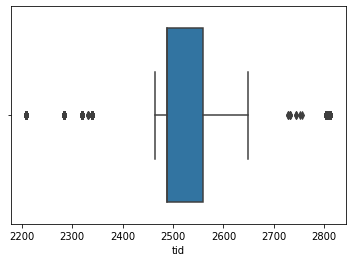

In [10]:
sns.boxplot(x=train.iloc[:10000]["tid"])

In [11]:
train.nunique()

file_id       9
label         3
api         166
tid          56
index      5001
dtype: int64

### 2.1.3 数据缺失值探索

In [12]:
train['index'].describe()

count    35951.000000
mean      2153.216267
std       1537.349809
min          0.000000
25%        722.000000
50%       2004.000000
75%       3502.000000
max       5000.000000
Name: index, dtype: float64

### 2.1.4 奇异值探索

In [13]:
train['index'].describe()

count    35951.000000
mean      2153.216267
std       1537.349809
min          0.000000
25%        722.000000
50%       2004.000000
75%       3502.000000
max       5000.000000
Name: index, dtype: float64

In [14]:
train['tid'].describe()

count    35952.000000
mean      2494.964564
std        129.979938
min        282.000000
25%       2456.000000
50%       2500.000000
75%       2596.000000
max       2980.000000
Name: tid, dtype: float64

### 2.1.5 标签分布探索

In [15]:
train['label'].value_counts()

0    28350
5     6786
2      816
Name: label, dtype: int64

<AxesSubplot:>

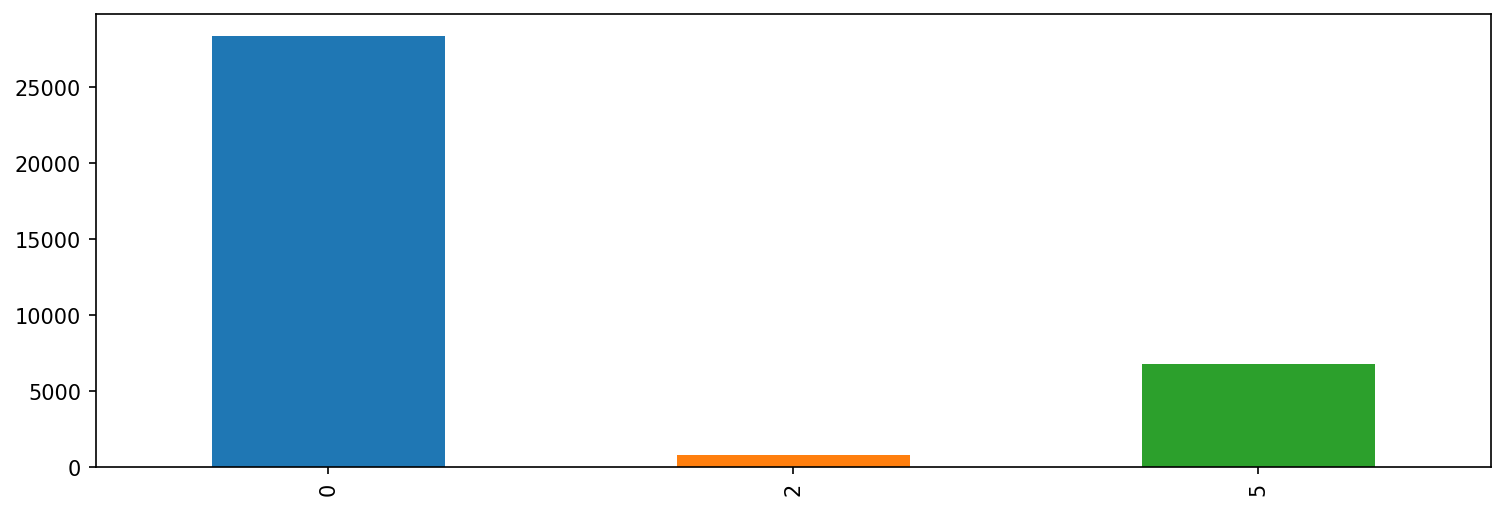

In [16]:
plt.figure(figsize=(12,4),dpi=150)
train['label'].value_counts().sort_index().plot(kind = 'bar')

<AxesSubplot:ylabel='label'>

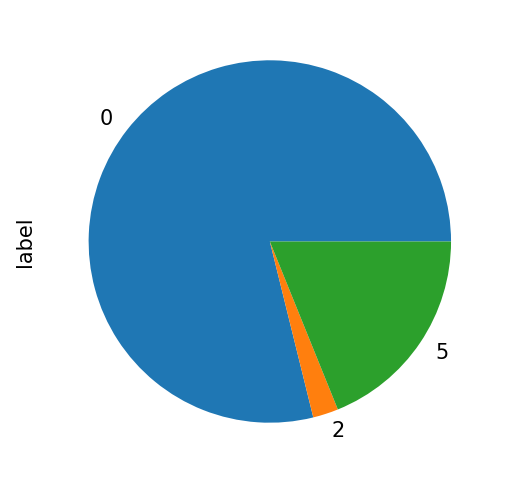

In [17]:
plt.figure(figsize=(4,4),dpi=150)
train['label'].value_counts().sort_index().plot(kind = 'pie')

## 2.2 测试集探索

### 2.2.1 数据信息

In [18]:
test.head()

,file_id,api,tid,index
0,1,RegOpenKeyExA,2332.0,0.0
1,1,CopyFileA,2332.0,1.0
2,1,OpenSCManagerA,2332.0,2.0
3,1,CreateServiceA,2332.0,3.0
4,1,RegOpenKeyExA,2468.0,0.0


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39173 entries, 0 to 39172
Data columns (total 4 columns):
file_id    39173 non-null int64
api        39173 non-null object
tid        39172 non-null float64
index      39172 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


### 2.2.2 缺失值探索

In [20]:
test.isnull().sum()

file_id    0
api        0
tid        1
index      1
dtype: int64

### 2.2.3 数据分布探索

In [21]:
test.nunique()

file_id      10
api         146
tid         125
index      5001
dtype: int64

### 2.2.4 奇异值探索

In [22]:
test['index'].describe()

count    39172.000000
mean      1729.569284
std       1486.018402
min          0.000000
25%        405.750000
50%       1342.000000
75%       2876.000000
max       5000.000000
Name: index, dtype: float64

In [23]:
test['tid'].describe()

count    39172.000000
mean      2158.769938
std        464.152821
min        504.000000
25%       2092.000000
50%       2224.000000
75%       2500.000000
max       2920.000000
Name: tid, dtype: float64

## 2.3 数据集联合分析

### 2.3.1 file_id分析

In [24]:
train_fileids = train['file_id'].unique()
test_fileids  = test['file_id'].unique()

In [25]:
len(set(train_fileids)-set(test_fileids))   

0

In [26]:
len(set(test_fileids)-set(train_fileids))   

1

### 2.3.2 API分析

In [27]:
train_apis = train['api'].unique()
test_apis  = test['api'].unique()

In [28]:
set(test_apis)-set(train_apis)

{'CertCreateCertificateContext',
 'CertOpenSystemStoreA',
 'CoInitializeSecurity',
 'CreateServiceA',
 'CryptAcquireContextW',
 'FindWindowA',
 'FindWindowExW',
 'GetComputerNameA',
 'GetFileVersionInfoSizeW',
 'GetFileVersionInfoW',
 'IWbemServices_ExecQuery',
 'LookupAccountSidW',
 'LookupPrivilegeValueW',
 'OpenServiceW',
 'OutputDebugStringA',
 'R',
 'SendNotifyMessageW',
 'SetStdHandle',
 'StartServiceA',
 'StartServiceW',
 'UnhookWindowsHookEx',
 'connect',
 'timeGetTime'}

In [29]:
set(train_apis) - set(test_apis)

{'CertControlStore',
 'CryptAcquireContextA',
 'CryptCreateHash',
 'CryptExportKey',
 'CryptHashData',
 'DeviceIoControl',
 'DrawTextExA',
 'EncryptMessage',
 'EnumServicesStatusW',
 'FindResourceExA',
 'GetAdaptersAddresses',
 'GetAddrInfoW',
 'GetAsyncKeyState',
 'GetBestInterfaceEx',
 'GetFileInformationByHandle',
 'GetFileVersionInfoExW',
 'GetFileVersionInfoSizeExW',
 'GetUserNameA',
 'GetVolumePathNameW',
 'GlobalMemoryStatus',
 'HttpOpenRequestA',
 'InternetConnectA',
 'InternetOpenA',
 'IsDebuggerPresent',
 'Module32FirstW',
 'Module32NextW',
 'NtDeleteValueKey',
 'NtReadVirtualMemory',
 'OpenServiceA',
 'ReadProcessMemory',
 'RegEnumKeyExA',
 'RegEnumValueA',
 'RtlAddVectoredContinueHandler',
 'RtlAddVectoredExceptionHandler',
 'RtlRemoveVectoredExceptionHandler',
 'SetFileAttributesW',
 'SetFileTime',
 'SetWindowsHookExA',
 'Thread32First',
 'Thread32Next',
 'WriteConsoleA',
 'bind',
 'listen'}